In [274]:
import pandas as pd
import pylab as pl
import geopandas as gpd
from shapely.geometry import Point
%pylab inline

Populating the interactive namespace from numpy and matplotlib


##  Date / Hour / Weekday V.S. # of Twitter

In [222]:
time = pd.read_csv("./tw/time.csv")
time.shape

(473628, 2)

In [109]:
temp = pd.DataFrame(time)
temp['wd'] = temp['Tweeted_At'].map(lambda x: x.weekday_name)
temp['date'] = temp['Tweeted_At'].map(lambda x: x.date())
temp['hour'] = temp['Tweeted_At'].map(lambda x: x.hour)

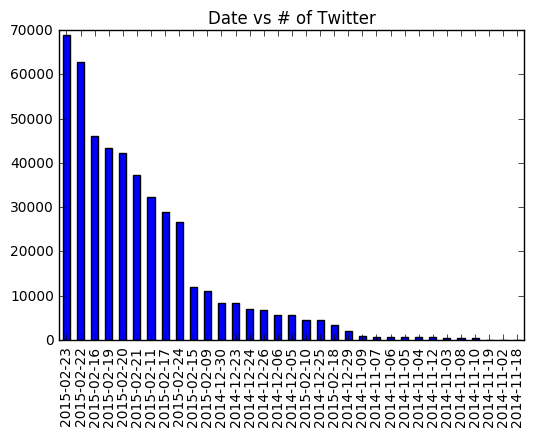

In [122]:
temp.date.value_counts().plot(kind='bar', title='Date vs # of Twitter')

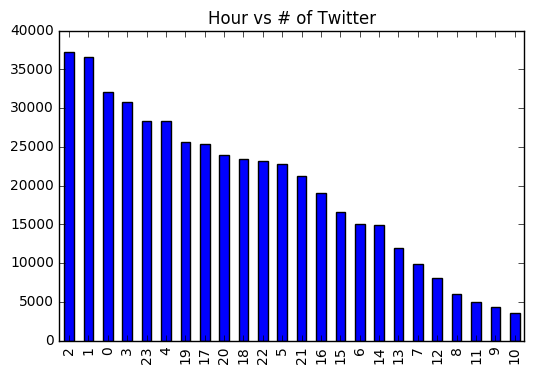

In [134]:
temp.hour.value_counts(sort=True).plot('bar', title="Hour vs # of Twitter")

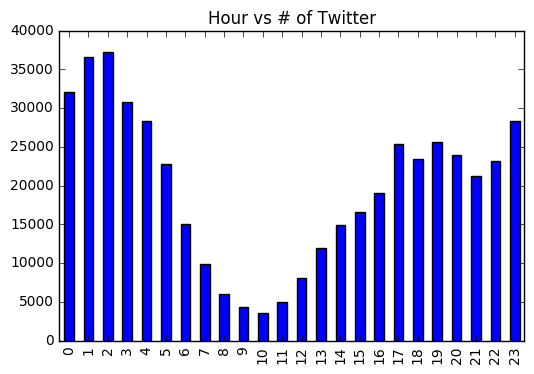

In [165]:
temp.hour.value_counts().sort_index().plot('bar', title="Hour vs # of Twitter")

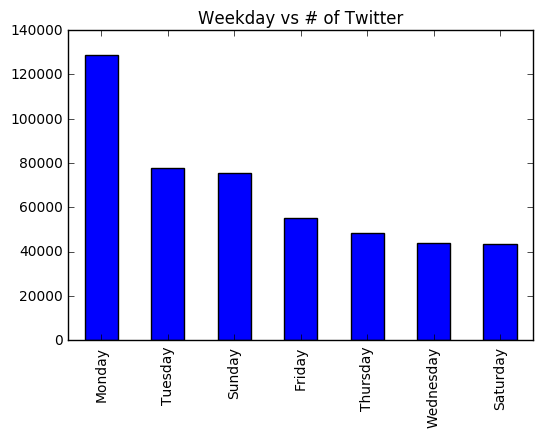

In [198]:
temp.wd.value_counts().plot('bar', title="Weekday vs # of Twitter")

<br/><br/><br/><br/>

## Tweets of one person during the day
### including datetime and location

In [226]:
data = pd.read_csv("./tw/tw_without_duplication.csv")
data.shape

(473629, 12)

In [230]:
len(data.Username.unique())

69097

In [246]:
name = {}
for i in range(data.shape[0]):
    username = data.Username[i]
    name[username] = name.get(username, 0) + 1
    
for user, num in name.iteritems():
    if num > 1000: # users who post more than 1000 tweets
        print user

MrNaassir
NewYorkCP
MJStarLover
cydiadono
DenzelPhoenix


In [276]:
name_top = sorted(name.items(), key=lambda x: x[1], reverse=True)
# a list contains all the unique users (by 'Username') , sorted by the # of twitters in descending order.

print name_top[0] 
top1 = data[data.Username == name_top[0][0]]
top1['datetime'] = pd.to_datetime(top1['Tweeted_At'])
top1.to_csv("./tw/MrNaassir.csv")

('MrNaassir', 1875)


/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
